# Bayesian Linear Regression

Simple Linear Regression Results:
Mean Squared Error: 0.5111
R^2 Score: 0.8698
Coefficient: [[2.79002054]]
Intercept: [4.10611051]

Bayesian Ridge Results:
Mean Squared Error: 0.5112
R^2 Score: 0.8698
Coefficient: [2.77779708]
Intercept: 4.117592209152521

ARD Regression Results:
Mean Squared Error: 0.5112
R^2 Score: 0.8698
Coefficient: [2.77779708]
Intercept: 4.117592209152523


/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


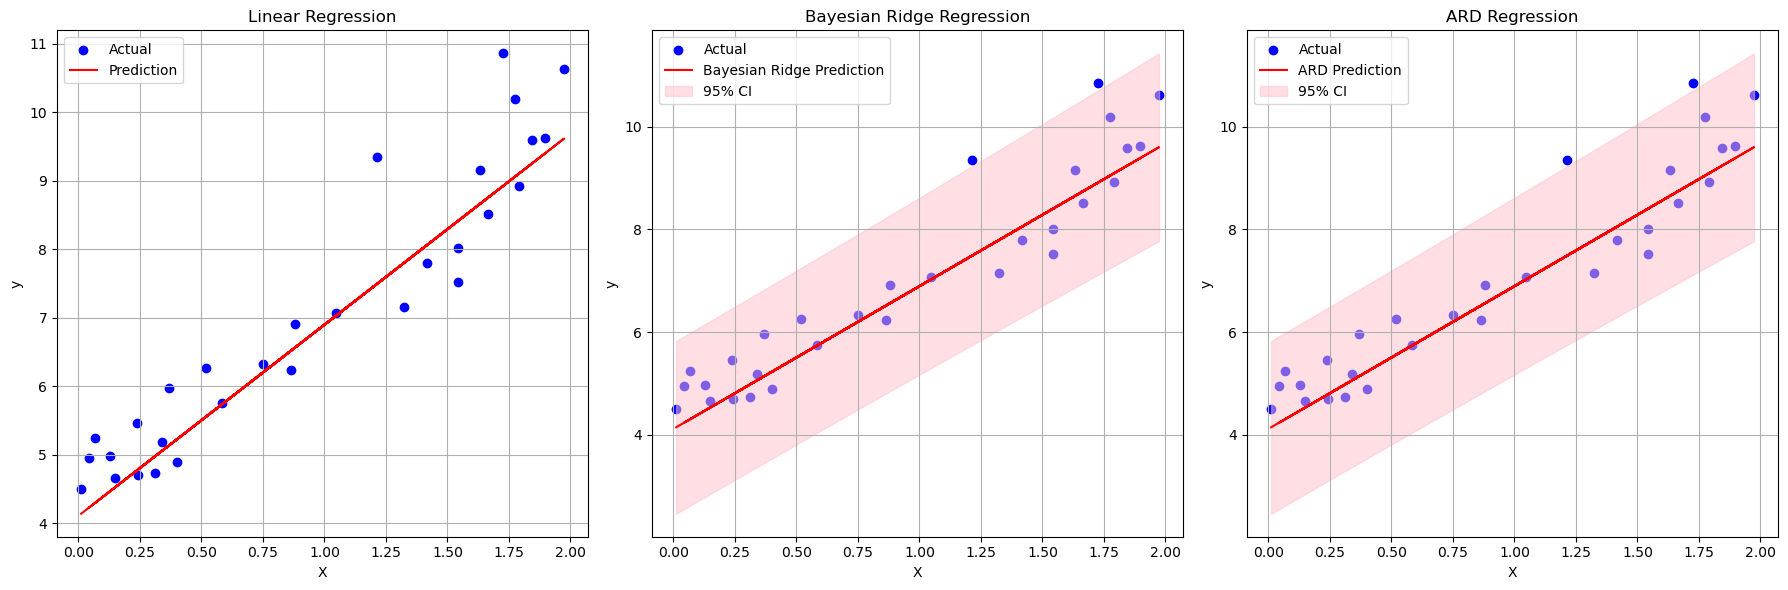

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression
from sklearn.metrics import mean_squared_error, r2_score

noise_factor = 0.9

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * noise_factor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===================== Linear Regression =====================
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("Simple Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lin):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lin):.4f}")
print("Coefficient:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# ===================== Bayesian Ridge =====================
bayes_reg = BayesianRidge()
bayes_reg.fit(X_train, y_train)
y_pred_bayes, y_std_bayes = bayes_reg.predict(X_test, return_std=True)

print("\nBayesian Ridge Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_bayes):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_bayes):.4f}")
print("Coefficient:", bayes_reg.coef_)
print("Intercept:", bayes_reg.intercept_)

# ===================== ARD Regression =====================
ard_reg = ARDRegression()
ard_reg.fit(X_train, y_train)
y_pred_ard, y_std_ard = ard_reg.predict(X_test, return_std=True)

print("\nARD Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ard):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_ard):.4f}")
print("Coefficient:", ard_reg.coef_)
print("Intercept:", ard_reg.intercept_)

# ===================== Plotting =====================

# Sort test points for smooth lines
sorted_idx = np.argsort(X_test.squeeze())
X_sorted = X_test.squeeze()[sorted_idx]

# Compute CI for ARD
ci_upper_ard = y_pred_ard + 1.96 * y_std_ard        # 1.96 standard deviations is ~ 95% CI
ci_lower_ard = y_pred_ard - 1.96 * y_std_ard

# Compute CI for Bayesian Ridge
ci_upper_bayes = y_pred_bayes + 1.96 * y_std_bayes
ci_lower_bayes = y_pred_bayes - 1.96 * y_std_bayes

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# ----- Linear Regression -----
ax[0].scatter(X_test, y_test, color='blue', label='Actual')
ax[0].plot(X_test, y_pred_lin, color='red', label='Prediction')
ax[0].set_title('Linear Regression')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].grid(True)

# ----- Bayesian Ridge -----
ax[1].scatter(X_test, y_test, color='blue', label='Actual')
ax[1].plot(X_test, y_pred_bayes, color='red', label='Bayesian Ridge Prediction')
ax[1].fill_between(X_sorted,
                   ci_lower_bayes[sorted_idx],
                   ci_upper_bayes[sorted_idx],
                   color='pink', alpha=0.5, label='95% CI')
ax[1].set_title('Bayesian Ridge Regression')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].grid(True)

# ----- ARD Regression -----
ax[2].scatter(X_test, y_test, color='blue', label='Actual')
ax[2].plot(X_test, y_pred_ard, color='red', label='ARD Prediction')
ax[2].fill_between(X_sorted,
                   ci_lower_ard[sorted_idx],
                   ci_upper_ard[sorted_idx],
                   color='pink', alpha=0.5, label='95% CI')
ax[2].set_title('ARD Regression')
ax[2].set_xlabel('X')
ax[2].set_ylabel('y')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()


Simple Polynomial Regression Results:
Mean squared error: 0.5201
R2 value: 0.9218

Bayesian Regression (BayesianRidge) Results:
Mean squared error: 0.5140
R2 value: 0.9227

Bayesian Regression (ARDRegression) Results:
Mean squared error: 0.5201
R2 value: 0.9217


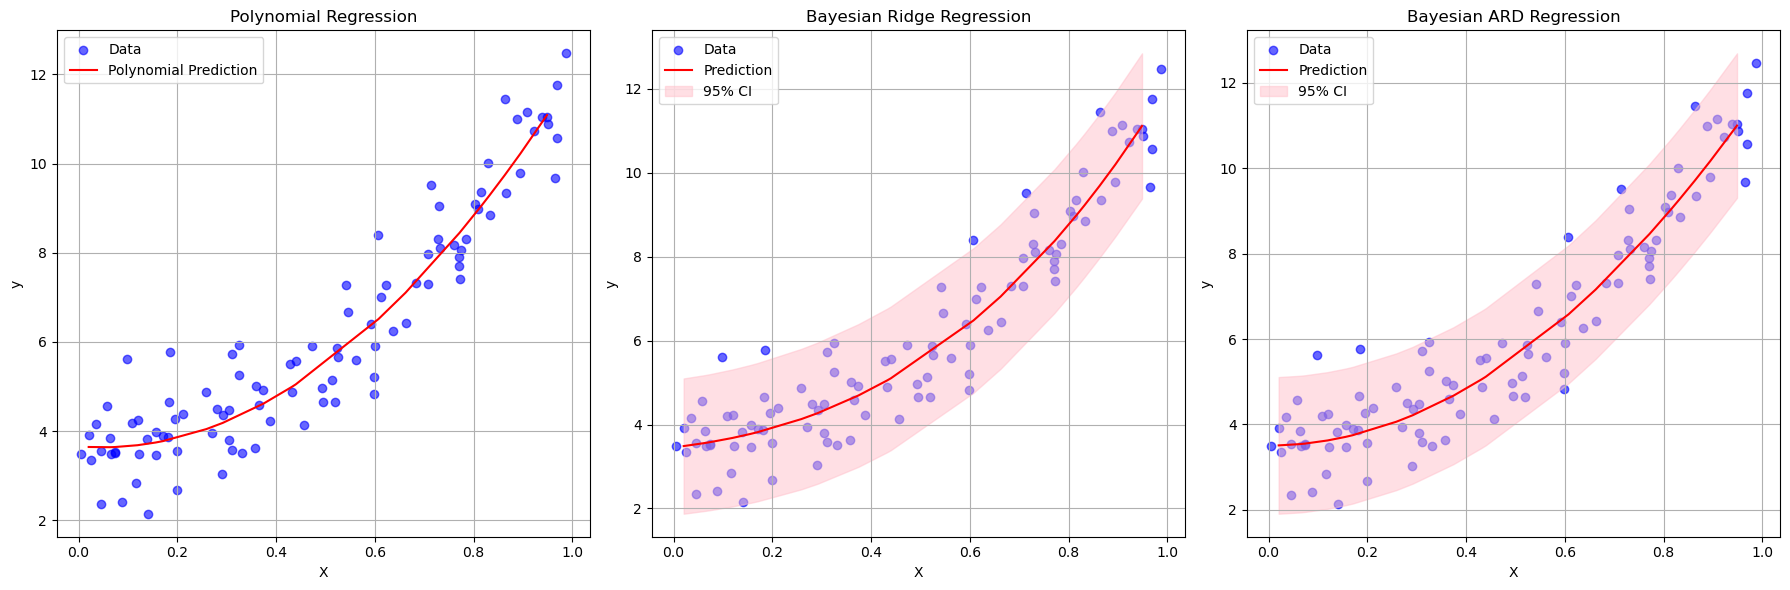

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ============ Make synthetic data ============
noise_factor = 0.9
np.random.seed(42)

X = np.random.rand(100, 1)
y = 3 + 4*X + X**2 + 4*X**3 + noise_factor * np.random.randn(100, 1)

# Polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8, random_state=42)

# ============= Linear Regression ===============
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("Simple Polynomial Regression Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_poly):.4f}")
print(f"R2 value: {r2_score(y_test, y_pred_poly):.4f}")

# =============== Bayesian Ridge ===============
bayes_model = BayesianRidge()
bayes_model.fit(X_train, y_train.ravel())
y_pred_baye, y_std_baye = bayes_model.predict(X_test, return_std=True)

print("\nBayesian Regression (BayesianRidge) Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_baye):.4f}")
print(f"R2 value: {r2_score(y_test, y_pred_baye):.4f}")

# =============== ARD Regression ===============
ard_model = ARDRegression()
ard_model.fit(X_train, y_train.ravel())
y_pred_ard, y_std_ard = ard_model.predict(X_test, return_std=True)

print("\nBayesian Regression (ARDRegression) Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_ard):.4f}")
print(f"R2 value: {r2_score(y_test, y_pred_ard):.4f}")

# =============== Plotting ===============

# Sort X_test and predictions by X[:, 0] for smooth curves
X_test_original = X_test[:, 0]  # Original (non-poly) feature
sorted_idx = np.argsort(X_test_original)
X_sorted = X_test_original[sorted_idx]

# Sort predictions and std
y_pred_poly_sorted = y_pred_poly[sorted_idx]
y_pred_baye_sorted = y_pred_baye[sorted_idx]
y_baye_std_sorted = y_std_baye[sorted_idx]
y_pred_ard_sorted = y_pred_ard[sorted_idx]
y_ard_std_sorted = y_std_ard[sorted_idx]

# Compute 95% confidence intervals
z = 1.96
baye_upper = y_pred_baye_sorted + z * y_baye_std_sorted
baye_lower = y_pred_baye_sorted - z * y_baye_std_sorted
ard_upper = y_pred_ard_sorted + z * y_ard_std_sorted
ard_lower = y_pred_ard_sorted - z * y_ard_std_sorted

# Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# --- Polynomial Regression Plot ---
ax[0].scatter(X[:, 0], y, color='blue', alpha=0.6, label='Data')
ax[0].plot(X_sorted, y_pred_poly_sorted, color='red', label='Polynomial Prediction')
ax[0].set_title('Polynomial Regression')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].grid(True)

# --- Bayesian Ridge Plot ---
ax[1].scatter(X[:, 0], y, color='blue', alpha=0.6, label='Data')
ax[1].plot(X_sorted, y_pred_baye_sorted, color='red', label='Prediction')
ax[1].fill_between(X_sorted, baye_lower, baye_upper,
                   color='pink', alpha=0.5, label='95% CI')
ax[1].set_title('Bayesian Ridge Regression')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].grid(True)

# --- ARD Regression Plot ---
ax[2].scatter(X[:, 0], y, color='blue', alpha=0.6, label='Data')
ax[2].plot(X_sorted, y_pred_ard_sorted, color='red', label='Prediction')
ax[2].fill_between(X_sorted, ard_lower, ard_upper,
                   color='pink', alpha=0.5, label='95% CI')
ax[2].set_title('Bayesian ARD Regression')
ax[2].set_xlabel('X')
ax[2].set_ylabel('y')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()
